In [40]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [41]:

# Assuming the CSV file is in the same directory as the SQLite database
csv_file_path = '/Users/antonialutz/.morpho_minds_data/24277/raw/mean_well_profiles.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Preprocess the data: let's assume all columns except the first one (usually an ID or label column) are features
features = df.columns[1:]
X = df[features]


In [42]:
df.head

<bound method NDFrame.head of      Metadata_Plate Metadata_Well  Metadata_Assay_Plate_Barcode  \
0             24277           a01                         24277   
1             24277           a02                         24277   
2             24277           a03                         24277   
3             24277           a04                         24277   
4             24277           a05                         24277   
..              ...           ...                           ...   
379           24277           p20                         24277   
380           24277           p21                         24277   
381           24277           p22                         24277   
382           24277           p23                         24277   
383           24277           p24                         24277   

    Metadata_Plate_Map_Name Metadata_well_position Metadata_ASSAY_WELL_ROLE  \
0              H-BIOA-004-3                    a01                  treated   
1      

In [43]:
# Assuming the first column contains non-numeric data
numeric_data = df.select_dtypes(include=[np.number])

# Perform imputation on numeric data only
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = imputer.fit_transform(numeric_data)

# Standardize the numeric data
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data_imputed)


/Users/antonialutz/.pyenv/versions/3.10.6/envs/MorphoMind/lib/python3.10/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['Metadata_pert_id_vendor']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [44]:
# Determine the optimal number of clusters (here we'll assume it is already determined)
# You can use methods like Elbow method or Silhouette analysis to determine it
n_clusters = 4  # This is an example, adjust based on your needs

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(numeric_data_scaled)
df['Cluster'] = kmeans.fit_predict(numeric_data_scaled)

# Output the first few rows to see the cluster assignments
print(df.head())

   Metadata_Plate Metadata_Well  Metadata_Assay_Plate_Barcode  \
0           24277           a01                         24277   
1           24277           a02                         24277   
2           24277           a03                         24277   
3           24277           a04                         24277   
4           24277           a05                         24277   

  Metadata_Plate_Map_Name Metadata_well_position Metadata_ASSAY_WELL_ROLE  \
0            H-BIOA-004-3                    a01                  treated   
1            H-BIOA-004-3                    a02                  treated   
2            H-BIOA-004-3                    a03                  treated   
3            H-BIOA-004-3                    a04                  treated   
4            H-BIOA-004-3                    a05                  treated   

    Metadata_broad_sample  Metadata_mmoles_per_liter Metadata_solvent  \
0  BRD-K18250272-003-03-7                   3.022516             DMSO   


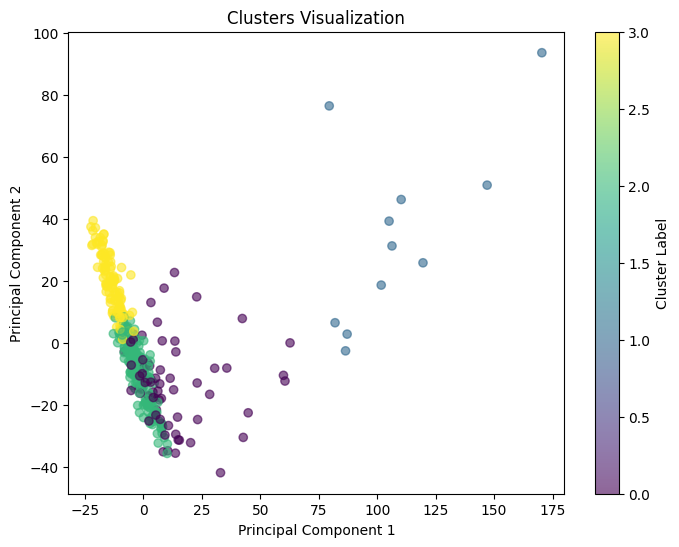

In [45]:
# Reduce the data to two principal components for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numeric_data_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.6)
plt.title('Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [46]:
# Filter the DataFrame for each cluster of interest and get the well names
wells_in_cluster_0 = df[df['Cluster'] == 0]['Metadata_Well'].tolist()
wells_in_cluster_1 = df[df['Cluster'] == 1]['Metadata_Well'].tolist()
wells_in_cluster_4 = df[df['Cluster'] == 4]['Metadata_Well'].tolist()
wells_in_cluster_2 = df[df['Cluster'] == 2]['Metadata_Well'].tolist()
wells_in_cluster_3 = df[df['Cluster'] == 3]['Metadata_Well'].tolist()


# Now, print the lists of wells
print("Wells in Cluster 0:", wells_in_cluster_0)
print("Wells in Cluster 1:", wells_in_cluster_1)
print("Wells in Cluster 4:", wells_in_cluster_4)
print("Wells in Cluster 2:", wells_in_cluster_2)
print("Wells in Cluster 3:", wells_in_cluster_3)

Wells in Cluster 0: ['a01', 'a04', 'a05', 'a07', 'a11', 'a15', 'a16', 'a18', 'a21', 'b16', 'b19', 'b20', 'c01', 'c04', 'c08', 'c10', 'c24', 'd06', 'e01', 'e05', 'e11', 'f13', 'f20', 'g01', 'h06', 'h08', 'i01', 'i13', 'i16', 'i19', 'j09', 'j23', 'k10', 'k11', 'k19', 'l01', 'l06', 'l11', 'l20', 'l21', 'm07', 'm18', 'm23', 'n01', 'n03', 'n06', 'n18', 'o01', 'o03', 'o05', 'o08', 'o13', 'o14', 'o15', 'o16', 'o17', 'o24', 'p01', 'p02', 'p03', 'p05', 'p06', 'p08', 'p09', 'p10', 'p11', 'p12', 'p14', 'p16', 'p20']
Wells in Cluster 1: ['a06', 'c02', 'd02', 'd13', 'i09', 'j10', 'm16', 'm20', 'n22', 'o10', 'p13']
Wells in Cluster 4: []
Wells in Cluster 2: ['a02', 'a03', 'a10', 'a12', 'a13', 'a14', 'a19', 'a20', 'a24', 'b01', 'b03', 'b05', 'b10', 'b11', 'b14', 'b17', 'b18', 'c03', 'c05', 'c06', 'c07', 'c11', 'c12', 'c13', 'c14', 'c15', 'c17', 'c18', 'c19', 'c21', 'c23', 'd03', 'd04', 'd05', 'd08', 'd09', 'd10', 'd11', 'd12', 'd14', 'd15', 'd16', 'd17', 'd20', 'e03', 'e04', 'e06', 'e10', 'e12', 'e13

In [47]:
# Get the 'Metadata_ASSAY_WELL_ROLE' values for wells in the desired clusters
assay_well_role_cluster_0 = df[df['Cluster'] == 0]['Metadata_ASSAY_WELL_ROLE']
assay_well_role_cluster_1 = df[df['Cluster'] == 1]['Metadata_ASSAY_WELL_ROLE']
assay_well_role_cluster_4 = df[df['Cluster'] == 4]['Metadata_ASSAY_WELL_ROLE']

# Now, display the contents
print("Metadata_ASSAY_WELL_ROLE for Cluster 0:")
print(assay_well_role_cluster_0.to_string(index=False))

print("\nMetadata_ASSAY_WELL_ROLE for Cluster 1:")
print(assay_well_role_cluster_1.to_string(index=False))

print("\nMetadata_ASSAY_WELL_ROLE for Cluster 4:")
print(assay_well_role_cluster_4.to_string(index=False))

Metadata_ASSAY_WELL_ROLE for Cluster 0:
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
   mock
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
   mock
   mock
treated
treated
treated

Metadata_ASSAY_WELL_ROLE for Cluster 1:
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated
treated

Metadata_ASSAY_WELL_ROLE for Cluster 4:
Series([], )


In [49]:
# Filter the DataFrame for the desired clusters
cluster_0_df = df[df['Cluster'] == 0]
cluster_1_df = df[df['Cluster'] == 1]
cluster_4_df = df[df['Cluster'] == 4]

# Create dictionaries for each cluster
cluster_0_dict = dict(zip(cluster_0_df['Metadata_Well'], cluster_0_df['Metadata_ASSAY_WELL_ROLE']))
cluster_1_dict = dict(zip(cluster_1_df['Metadata_Well'], cluster_1_df['Metadata_ASSAY_WELL_ROLE']))
cluster_4_dict = dict(zip(cluster_4_df['Metadata_Well'], cluster_4_df['Metadata_ASSAY_WELL_ROLE']))

print(f"Cluster 0 = {cluster_0_dict}")
print(f"Cluster 1 = {cluster_1_dict}")
print(f"Cluster 4 = {cluster_4_dict}")


Cluster 0 = {'a01': 'treated', 'a04': 'treated', 'a05': 'treated', 'a07': 'treated', 'a11': 'treated', 'a15': 'treated', 'a16': 'treated', 'a18': 'treated', 'a21': 'treated', 'b16': 'treated', 'b19': 'treated', 'b20': 'treated', 'c01': 'treated', 'c04': 'treated', 'c08': 'treated', 'c10': 'treated', 'c24': 'treated', 'd06': 'treated', 'e01': 'mock', 'e05': 'treated', 'e11': 'treated', 'f13': 'treated', 'f20': 'treated', 'g01': 'treated', 'h06': 'treated', 'h08': 'treated', 'i01': 'treated', 'i13': 'treated', 'i16': 'treated', 'i19': 'treated', 'j09': 'treated', 'j23': 'treated', 'k10': 'treated', 'k11': 'treated', 'k19': 'treated', 'l01': 'treated', 'l06': 'treated', 'l11': 'treated', 'l20': 'treated', 'l21': 'treated', 'm07': 'treated', 'm18': 'treated', 'm23': 'treated', 'n01': 'treated', 'n03': 'treated', 'n06': 'treated', 'n18': 'treated', 'o01': 'treated', 'o03': 'treated', 'o05': 'treated', 'o08': 'treated', 'o13': 'treated', 'o14': 'treated', 'o15': 'treated', 'o16': 'treated', 

In [50]:
for key, value in cluster_0_dict.items():
    if value == "mock":
        print(key)

e01
p11
p12


### Test how the Clusters 2 and 3 look in PCA

In [51]:
clusters_2_and_3_df = df[df['Cluster'].isin([2, 3])]

In [62]:
# Assuming the first column contains non-numeric data
numeric_data_2 = clusters_2_and_3_df.select_dtypes(include=[np.number])

# Perform imputation on numeric data only
imputer_2 = SimpleImputer(strategy='mean')
numeric_data_imputed_2 = imputer_2.fit_transform(numeric_data_2)




/Users/antonialutz/.pyenv/versions/3.10.6/envs/MorphoMind/lib/python3.10/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['Metadata_pert_id_vendor']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [60]:
# Standardize the numeric data
scaler_2 = StandardScaler()
numeric_data_scaled_2 = scaler_2.fit_transform(numeric_data_imputed_2)

/Users/antonialutz/.pyenv/versions/3.10.6/envs/MorphoMind/lib/python3.10/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/antonialutz/.pyenv/versions/3.10.6/envs/MorphoMind/lib/python3.10/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/antonialutz/.pyenv/versions/3.10.6/envs/MorphoMind/lib/python3.10/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [63]:
# Perform the clustering on the standardized numeric features
# Choose the number of clusters according to your dataset characteristics
kmeans_new = KMeans(n_clusters=2, random_state=42)  # Adjust the number of clusters as needed
new_cluster_labels = kmeans_new.fit_predict(numeric_data_scaled_2)

In [64]:
# Perform PCA to reduce the data to two principal components for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numeric_data_scaled_2)

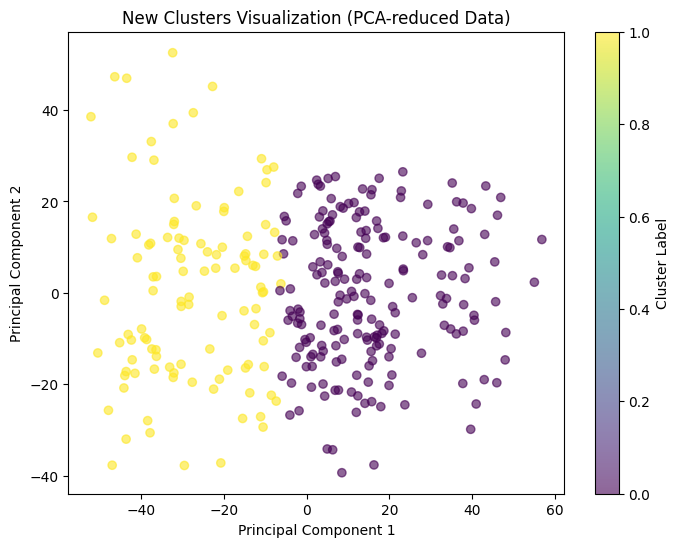

In [65]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=new_cluster_labels, cmap='viridis', marker='o', alpha=0.6)
plt.title('New Clusters Visualization (PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()